# --- Modelado

## Cargamos librerias

In [1]:
!pip install tensorflow
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import requests
import seaborn as sns
import sklearn.multiclass
import tensorflow as tf
from numpy import array 
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from tensorflow import keras
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from sklearn.metrics import multilabel_confusion_matrix

## Vamos a leer nuestra base de datos

In [2]:
url="https://raw.githubusercontent.com/TFM123456/Big_Data_and_Data_Science_UCM/main/datos_galicia_limpio.csv"
s=requests.get(url).content
datos_galicia=pd.read_csv(io.StringIO(s.decode('ISO-8859-1')))

# EDA - Análisis exploratorio de datos

In [3]:
datos_galicia.head()

,Unnamed: 0,id,superficie,fecha,lat,lng,idprovincia,idmunicipio,causa,muertos,...,TMIN,TMAX,VELMEDIA,RACHA,SOL,Trimestre,Mes,Año,DIR_VIENTO,PRES_RANGE
0,1,2001150021,5.0,2001-02-20,43.703581,-8.038777,A Coruña,CEDEIRA,negligencia,0,...,7.0,15.6,2-4 m/s,16.9,10.2,Q1,febrero,2001,E,4.4
1,3,2001150094,1.5,2001-02-25,43.186836,-8.685470,A Coruña,CARBALLO,intencionado,0,...,6.5,11.6,4-6 m/s,11.1,10.2,Q1,febrero,2001,NE,4.7
2,5,2001150145,1.5,2001-04-13,43.699889,-7.984566,A Coruña,CEDEIRA,negligencia,0,...,10.4,17.4,4-6 m/s,13.9,12.1,Q2,abril,2001,NE,3.2
3,6,2001150151,1.1,2001-04-13,42.758649,-8.917814,A Coruña,LOUSAME,causa desconocida,0,...,10.4,17.4,4-6 m/s,13.9,12.1,Q2,abril,2001,NE,3.2
4,7,2001150153,1.5,2001-04-13,43.063218,-9.235604,A Coruña,MUXÃÂA,intencionado,0,...,10.4,17.4,4-6 m/s,13.9,12.1,Q2,abril,2001,NE,3.2


In [4]:
print('El dataset tiene un total de {} lineas y {} columnas'.format(datos_galicia.shape[0],datos_galicia.shape[1]))

El dataset tiene un total de 12976 lineas y 29 columnas


Podemos ver también cómo se distribuyen nuestras variables:

<!-- Podemos también ver cómo se distribuyen nuestras variables: -->

In [5]:
datos_galicia.describe()

,Unnamed: 0,id,superficie,lat,lng,muertos,heridos,time_ctrl,time_ext,personal,medios,TMEDIA,PRECIPITACION,TMIN,TMAX,RACHA,SOL,Año,PRES_RANGE
count,12976.000000,1.297600e+04,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,9781.431181,2.005867e+09,2.586703,42.555421,-7.994614,0.000077,0.000462,1.781149,1.781149,12.281520,1.964396,16.584664,0.132167,9.717810,23.452366,8.537230,8.547102,2005.592555,3.836675
std,5848.203194,3.830998e+06,1.863610,0.451212,0.562395,0.008779,0.021499,0.894420,0.894420,7.252796,1.674277,5.954963,0.338685,6.252533,7.001220,3.298872,3.549735,3.828872,1.639618
min,1.000000,2.001150e+09,1.000000,41.833819,-9.293500,0.000000,0.000000,0.040000,0.040000,0.000000,0.000000,-1.300000,0.000000,-8.600000,5.600000,1.700000,0.000000,2001.000000,0.000000
25%,4839.750000,2.003150e+09,1.250000,42.189372,-8.422458,0.000000,0.000000,1.170000,1.170000,6.000000,1.000000,12.400000,0.000000,5.200000,18.600000,6.100000,6.500000,2003.000000,2.600000
50%,9402.500000,2.005151e+09,2.000000,42.470163,-7.987553,0.000000,0.000000,1.500000,1.500000,11.000000,2.000000,17.400000,0.000000,10.600000,23.400000,8.100000,9.400000,2005.000000,3.600000
75%,14958.500000,2.009150e+09,3.000000,42.932203,-7.556843,0.000000,0.000000,2.310000,2.310000,16.000000,3.000000,21.100000,0.000000,14.900000,28.400000,10.600000,11.200000,2009.000000,4.900000
max,20544.000000,2.015361e+09,10.200000,43.730713,-6.771548,1.000000,1.000000,4.190000,4.190000,33.000000,8.000000,31.200000,1.000000,23.400000,42.000000,28.300000,14.800000,2015.000000,8.600000


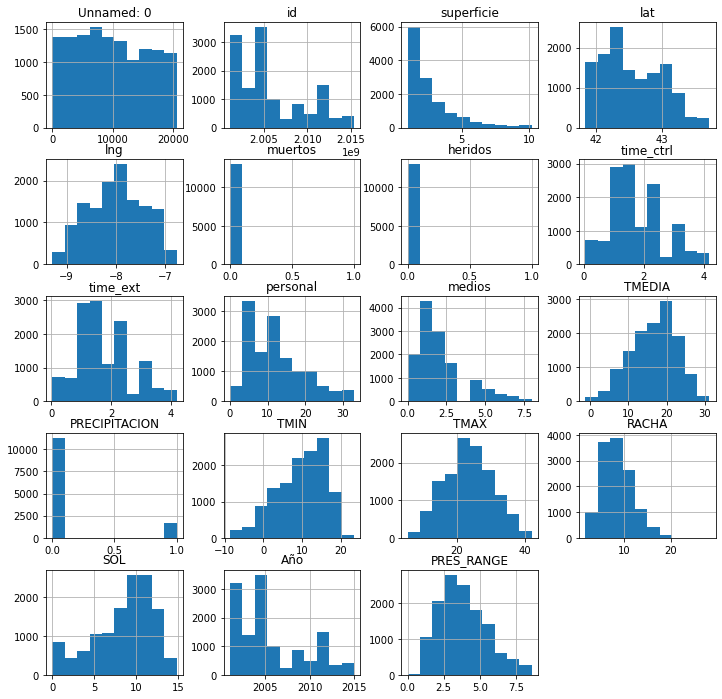

In [6]:
datos_galicia.hist(figsize = (12, 12));


Vamos a ver si los tipos de datos han migrado bien desde R

In [7]:
print('______________________________________________________________\n'
      '\n Tipo de datos a nivel de variable:\n'
      '______________________________________________________________\n\n\n{}'.format(datos_galicia.dtypes))

______________________________________________________________

 Tipo de datos a nivel de variable:
______________________________________________________________


Unnamed: 0         int64
id                 int64
superficie       float64
fecha             object
lat              float64
lng              float64
idprovincia       object
idmunicipio       object
causa             object
muertos            int64
heridos            int64
time_ctrl        float64
time_ext         float64
personal           int64
medios             int64
gastos            object
ALTITUD           object
TMEDIA           float64
PRECIPITACION      int64
TMIN             float64
TMAX             float64
VELMEDIA          object
RACHA            float64
SOL              float64
Trimestre         object
Mes               object
Año                int64
DIR_VIENTO        object
PRES_RANGE       float64
dtype: object


En primer lugar, generamos una copia de nuestro dataset para poder hacer modificaciones sin alterar el dataset original

In [8]:
datos_galicia1 = datos_galicia.copy()

In [9]:
print('Finalmente, nuestro dataset tiene un total de {} lineas y {} columnas'.format(datos_galicia1.shape[0],datos_galicia1.shape[1]))

Finalmente, nuestro dataset tiene un total de 12976 lineas y 29 columnas


### Valores faltantes - NaN

In [10]:
print('______________________________________________________________\n'
      '\n Numero de observaciones con datos faltantes:\n'
      '______________________________________________________________\n\n\n{}'.format(datos_galicia1.isnull().sum()))

______________________________________________________________

 Numero de observaciones con datos faltantes:
______________________________________________________________


Unnamed: 0       0
id               0
superficie       0
fecha            0
lat              0
lng              0
idprovincia      0
idmunicipio      0
causa            0
muertos          0
heridos          0
time_ctrl        0
time_ext         0
personal         0
medios           0
gastos           0
ALTITUD          0
TMEDIA           0
PRECIPITACION    0
TMIN             0
TMAX             0
VELMEDIA         0
RACHA            0
SOL              0
Trimestre        0
Mes              0
Año              0
DIR_VIENTO       0
PRES_RANGE       0
dtype: int64


Ahora, vamos a separar las variables categóricas de las numéricas.
Comprobamos los valores únicos por variable:

In [11]:
print('______________________________________________________________\n'
      '\n\t Número de observaciones únicos \n'
      '______________________________________________________________\n')
      
print('Dataset Galicia: ', datos_galicia1.shape)

df = pd.DataFrame(columns = ['Variable','Valores_unicos'])

for i in datos_galicia1.columns.values:
    df = df.append({'Variable':i, 'Valores_unicos':(len(datos_galicia1[i].unique()))}, ignore_index = True)

df

______________________________________________________________

	 Número de observaciones únicos 
______________________________________________________________

Dataset Galicia:  (12976, 29)


,Variable,Valores_unicos
0,Unnamed: 0,12976
1,id,12976
2,superficie,619
3,fecha,2272
4,lat,6118
5,lng,6121
6,idprovincia,4
7,idmunicipio,268
8,causa,5
9,muertos,2


Las variables Unnamed e id tienen tantos valores únicos como observaciones contienen, por lo que decidimos eliminar ambas variables:

In [12]:
datos_galicia1 = datos_galicia1.drop(columns=["Unnamed: 0"])
datos_galicia1 = datos_galicia1.drop(columns=["id"])

In [13]:
print('Después de haber eliminado las dos variables, nuestro dataset tiene un total de {} lineas y {} columnas'.format(datos_galicia1.shape[0],datos_galicia1.shape[1]))

Después de haber eliminado las dos variables, nuestro dataset tiene un total de 12976 lineas y 27 columnas


Teniendo en cuenta los valores únicos que componen cada variable y el tipo de dato, dividimos entre las variables categóricas y numéricas

In [14]:
lista_numericas=datos_galicia1._get_numeric_data()
lista_categoricas=datos_galicia1.select_dtypes(include = ["object"])

Comprobamos

In [15]:
len(lista_categoricas.columns)

10

In [16]:
len(lista_numericas.columns)

17

ha incluido correctamente todas las columnas. Vemos que incluye cada lista

In [17]:
lista_categoricas.columns

Index(['fecha', 'idprovincia', 'idmunicipio', 'causa', 'gastos', 'ALTITUD',
       'VELMEDIA', 'Trimestre', 'Mes', 'DIR_VIENTO'],
      dtype='object')

In [18]:
lista_numericas.columns

Index(['superficie', 'lat', 'lng', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'TMEDIA', 'PRECIPITACION', 'TMIN',
       'TMAX', 'RACHA', 'SOL', 'Año', 'PRES_RANGE'],
      dtype='object')

Vamos a ver como se distribuyen los valores en las variables categoricas

## Análisis de variables categóricas

In [19]:
for i in lista_categoricas:
    print(datos_galicia1[i].value_counts())

2005-03-19    59
2004-03-28    59
2001-09-18    58
2002-03-28    56
2002-09-02    55
              ..
2009-06-28     1
2006-09-13     1
2015-07-04     1
2008-07-18     1
2001-03-18     1
Name: fecha, Length: 2272, dtype: int64
Ourense       5762
A Coruña      3549
Pontevedra    2062
Lugo          1603
Name: idprovincia, dtype: int64
VIANA DO BOLO          436
MANZANEDA              352
CHANDREXA DE QUEIXA    295
MUIÃâOS             256
SANTA COMBA            234
                      ... 
CARIÃâO               1
RIBADUMIA                1
MUGARDOS                 1
BARREIROS                1
BEADE                    1
Name: idmunicipio, Length: 268, dtype: int64
intencionado         11293
causa desconocida      830
negligencia            534
fuego reproducido      215
rayo                   104
Name: causa, dtype: int64
NO INFO    10779
< 5K        1769
>5K          428
Name: gastos, dtype: int64
Superior a 125    5762
Inferior a 80     3549
Entre 80-125      2062
NO INFO        

La variable idmunicipio incluye demasiadas categorias, la eliminamos

In [20]:
datos_galicia1 = datos_galicia1.drop(columns=['idmunicipio'])

También vamos a prescindir de fecha, ya que la tenemos representada en varias variables : Trimestre / MES / Año

In [21]:
datos_galicia1 = datos_galicia1.drop(columns=['fecha'])

In [22]:
print('Nos quedamos con {} lineas y {} columnas'.format(datos_galicia1.shape[0],datos_galicia1.shape[1]))

Nos quedamos con 12976 lineas y 25 columnas


### Transformamos las variables categóricas -> codificación One-Hot y orden numérico

Las variables categóricas necesitan ser pasadas a categóricas para poder tratarlas. Hay varias formas de hacerlos pero las más comunes suelen ser transformarlas a variables ordinales o realizar la codificación One-Hot

Poner UN orden numérico en ocasiones dificulta la predicción ya que da diferentes pesos a las distintas categorías de una variable, por ello, esta transformación la vamos a utilizar para aquellas variables que sí sigan un orden en sus categoría

Por otro lado, para aquellas que no sigan un orden, utilizaremos la codificación One-Hot.
Este método consiste en crear una nueva variable binaria por cada categoria existente en la variable inicial, donde 
1 serán las observaciones que pertenezcan a esa categoría y 0 las demás.

En muchas tareas, tales como la regresión lineal, es común usar k-1 variables binarias en lugar de k, donde k es el número total de categorías. Esto se debe a que estamos añadiendo una variable extra redundante que no es más que una combinación lineal de las otras y seguramente afectará de manera negativa al rendimiento del modelo. Además, al eliminar una variable no estamos perdiendo información, ya que se entiende que, si el resto de las categorías contienen un 0, la categoría correspondiente es la de la variable eliminada.

* Se ha seleccionado esta opción tras probar con todas las variables categóricas en codificación One-Hot y todas en orden numérico

Vemos las variables categóricas de las que disponemos

In [23]:
print('______________________________________________________________\n'
      '\n\t Variables categóricas \n'
      '______________________________________________________________\n')
for x in lista_categoricas: 
    print(x)

______________________________________________________________

	 Variables categóricas 
______________________________________________________________

fecha
idprovincia
idmunicipio
causa
gastos
ALTITUD
VELMEDIA
Trimestre
Mes
DIR_VIENTO


In [24]:
'''categoricas con codificacion one-hot:  idprovincia, Trimestre, Mes, DIR_VIENTO'''

'categoricas con codificacion one-hot:  idprovincia, Trimestre, Mes, DIR_VIENTO'

In [25]:
dummies= pd.get_dummies(datos_galicia1['idprovincia'], drop_first = True)
datos_galicia1 = pd.concat([datos_galicia1, dummies], axis = 1)

dummies2= pd.get_dummies(datos_galicia1['Trimestre'], drop_first = True)
datos_galicia1 = pd.concat([datos_galicia1, dummies2], axis = 1)

dummies3= pd.get_dummies(datos_galicia1['Mes'], drop_first = True)
datos_galicia1 = pd.concat([datos_galicia1, dummies3], axis = 1)

dummies4= pd.get_dummies(datos_galicia1['DIR_VIENTO'], drop_first = True)
datos_galicia1 = pd.concat([datos_galicia1, dummies4], axis = 1)

In [26]:
len(dummies.columns)+len(dummies2.columns)+len(dummies3.columns)+len(dummies4.columns)

24

In [27]:
25+24

49

In [28]:
datos_galicia1.shape

(12976, 49)

Eliminamos las variables que hemos creado con one-hot

In [29]:
datos_galicia1 = datos_galicia1.drop(columns=['idprovincia'])
datos_galicia1 = datos_galicia1.drop(columns=['Trimestre'])
datos_galicia1 = datos_galicia1.drop(columns=['Mes'])
datos_galicia1 = datos_galicia1.drop(columns=['DIR_VIENTO'])

In [30]:
49-4

45

In [31]:
datos_galicia1.shape

(12976, 45)

In [32]:
'''variables orden numérico: gastos , ALTITUD, VELMEDIA'''

'variables orden numérico: gastos , ALTITUD, VELMEDIA'

In [33]:
datos_galicia1['gastos'].value_counts()

NO INFO    10779
< 5K        1769
>5K          428
Name: gastos, dtype: int64

In [34]:
datos_galicia1.gastos.replace(("NO INFO","< 5K ",">5K"),
                      (1,2,3),inplace=True)

In [35]:
datos_galicia1['ALTITUD'].value_counts()

Superior a 125    5762
Inferior a 80     3549
Entre 80-125      2062
NO INFO           1603
Name: ALTITUD, dtype: int64

In [36]:
datos_galicia1.ALTITUD.replace(("NO INFO","Inferior a 80","Entre 80-125","Superior a 125"),
                      (1,2,3,4),inplace=True)

In [37]:
datos_galicia1['VELMEDIA'].value_counts()

< 2 m/s    7366
2-4 m/s    3926
4-6 m/s    1125
6-8 m/s     385
> 8 m/s     174
Name: VELMEDIA, dtype: int64

In [38]:
datos_galicia1.VELMEDIA.replace(("< 2 m/s","2-4 m/s","4-6 m/s","6-8 m/s","> 8 m/s"),
                      (1,2,3,4,5),inplace=True)

Comprobamos los tipos de las variables a ver si solo tenemos numericas

In [39]:
datos_galicia1.dtypes

superficie       float64
lat              float64
lng              float64
causa             object
muertos            int64
heridos            int64
time_ctrl        float64
time_ext         float64
personal           int64
medios             int64
gastos             int64
ALTITUD            int64
TMEDIA           float64
PRECIPITACION      int64
TMIN             float64
TMAX             float64
VELMEDIA           int64
RACHA            float64
SOL              float64
Año                int64
PRES_RANGE       float64
Lugo               uint8
Ourense            uint8
Pontevedra         uint8
Q2                 uint8
Q3                 uint8
Q4                 uint8
agosto             uint8
diciembre          uint8
enero              uint8
febrero            uint8
julio              uint8
junio              uint8
marzo              uint8
mayo               uint8
noviembre          uint8
octubre            uint8
septiembre         uint8
N                  uint8
NE                 uint8


Vemos cómo ha quedado el dataset final

In [40]:
datos_galicia1.head()

,superficie,lat,lng,causa,muertos,heridos,time_ctrl,time_ext,personal,medios,...,noviembre,octubre,septiembre,N,NE,NW,S,SE,SW,W
0,5.0,43.703581,-8.038777,negligencia,0,0,3.55,3.55,14,2,...,0,0,0,0,0,0,0,0,0,0
1,1.5,43.186836,-8.685470,intencionado,0,0,2.05,2.05,5,0,...,0,0,0,0,1,0,0,0,0,0
2,1.5,43.699889,-7.984566,negligencia,0,0,1.50,1.50,9,1,...,0,0,0,0,1,0,0,0,0,0
3,1.1,42.758649,-8.917814,causa desconocida,0,0,3.10,3.10,18,2,...,0,0,0,0,1,0,0,0,0,0
4,1.5,43.063218,-9.235604,intencionado,0,0,1.35,1.35,14,1,...,0,0,0,0,1,0,0,0,0,0


In [41]:
print('Finalmente, el dataset tiene un total de {} lineas y {} columnas'.format(datos_galicia.shape[0],datos_galicia.shape[1]))

Finalmente, el dataset tiene un total de 12976 lineas y 29 columnas


# Modelado

Definimos nuestra variable objetivo -> Causa

In [42]:
datos_galicia1['target']=datos_galicia1['causa']

In [43]:
datos_galicia1 = datos_galicia1.drop(columns=['causa'])

Vamos a ver como se distribuye nuestra variable objetivo

In [44]:
print(datos_galicia1.groupby('target').size())

target
causa desconocida      830
fuego reproducido      215
intencionado         11293
negligencia            534
rayo                   104
dtype: int64


Podemos verlo también de una forma más visual

Text(0, 0.5, 'Número de observaciones')

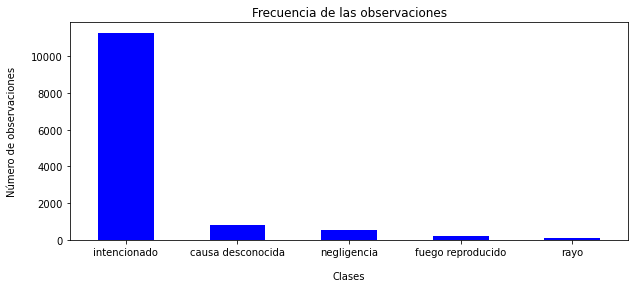

In [45]:
count_classes = datos_galicia1.value_counts(datos_galicia1['target'])
count_classes.plot(kind = 'bar', figsize=(10,4),rot=0, color = ['blue'])
plt.title("Frecuencia de las observaciones")
plt.xlabel("Clases",labelpad=14)
plt.ylabel("Número de observaciones",labelpad=14)


Como podemos comprobar, nuestra variable está desbalanceada y por lo tanto, tendremos que tenerlo en cuenta

Dividimos los datos en Train y Test y separamos ambas entre x -> entradas ( variables explicativas) e y-> salidas ( variable objetivo)
Nuestro conjunto de Train es el entrenamiento, en Test probaremos los resultados de nuestras predicciones.


In [139]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_galicia1.drop('target', axis = 'columns'),
                                        datos_galicia1['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True,
                                        stratify = datos_galicia1['target'])

Creamos train y test teniendo en cuenta el desbalanceo mediante el parámetro stratify.

Comprobamos:

In [140]:
print('______________________________________________________________\n'
      '\n Número de observaciones en el dataset de TRAIN y TEST \n'
      '______________________________________________________________\n')
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

for k in y_train.unique():
    print('\nTRAIN - % de incendios con causa =',k,': ', 
          round(((y_train[y_train==k].count() / y_train.shape[0])*100),2))
    print('TEST  - % de incendios con causa =',k,': ', 
          round(((y_test[y_test==k].count() / y_test.shape[0])*100),2))

______________________________________________________________

 Número de observaciones en el dataset de TRAIN y TEST 
______________________________________________________________

Train set: (10380, 44) (10380,)
Test set: (2596, 44) (2596,)

TRAIN - % de incendios con causa = 1 :  87.03
TEST  - % de incendios con causa = 1 :  87.02

TRAIN - % de incendios con causa = 4 :  1.66
TEST  - % de incendios con causa = 4 :  1.66

TRAIN - % de incendios con causa = 3 :  4.11
TEST  - % de incendios con causa = 3 :  4.12

TRAIN - % de incendios con causa = 2 :  6.4
TEST  - % de incendios con causa = 2 :  6.39

TRAIN - % de incendios con causa = 5 :  0.8
TEST  - % de incendios con causa = 5 :  0.81


Vemos que cada categoría se ha dividido de manera proporcional en la parte train y test

## Vamos a lanzar varios modelos con todas las variables

In [48]:
print("\n En un inicio contamos con el siguiente número de variables :")
print("\n  ", len(datos_galicia1.columns))


 En un inicio contamos con el siguiente número de variables :

   45


 #### -- sin normalizar

### * MODELO 1 -  Support Vector Machines = SVM

conjunto de métodos de aprendizaje supervisados. realiza un método one-against-one.

NearMiss es una técnica de submuestreo. En lugar de volver a muestrear la clase minoritaria, utilizando una distancia, esto hará que la clase mayoritaria sea igual a la clase minoritaria.

In [49]:
modelo_clf = svm.SVC()
modelo_clf.fit(X_train, y_train)


modelo_clf.predict(X_test)

modelo1 = ('MODELO 1 :Score modelo SVM : {} con todas las variables: {}'.format(modelo_clf.score(X_test,y_test),len(datos_galicia1.columns)))
modelo1

'MODELO 1 :Score modelo SVM : 0.8701848998459168 con todas las variables: 45'

--------------------------------------

### * MODELO 2 -  Árbol de decisión

Modelo que se basa en una combinación y subdivision en ramas de las variables de una forma binaria para la toma de la decisión con mayor probabilidad de que ocurra un suceso¶

In [50]:
modelo_arbol = DecisionTreeClassifier().fit(X_train, y_train)
y_pred        = modelo_arbol.predict(X_test)

modelo2 = ('MODELO 2 : Score modelo Árbol de decisión : {} con todas las variables: {}'.format(modelo_arbol.score(X_test,y_test),len(datos_galicia1.columns)))
modelo2

'MODELO 2 : Score modelo Árbol de decisión : 0.7654083204930663 con todas las variables: 45'

---------------------------------------------------

### * MODELO 3 -  Random Forest

Conjunto de árboles de decisión

In [51]:
modelo_ranfor = RandomForestClassifier().fit(X_train, y_train)
y_pred     = modelo_ranfor.predict(X_test)

modelo3 = ('MODELO 3 : Score modelo Random Forest : {} con todas las variables: {}'.format(modelo_ranfor.score(X_test,y_test),len(datos_galicia1.columns)))
modelo3

'MODELO 3 : Score modelo Random Forest : 0.8694144838212635 con todas las variables: 45'

-------------------------------------

### * MODELO 4 -  GradientBoosting

está formado por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores.
La diferencia con Random Forest es que utiliza árboles más débiles, con menos profundidad.

In [52]:
modelo_gbrt = GradientBoostingClassifier(random_state=0, n_estimators=500,
                                  max_depth=1, learning_rate=0.01)
modelo_gbrt.fit(X_train, y_train)


modelo4 = ('MODELO 4 : Score modelo Gradient Boosting : {} con todas las variables : {} '.format(modelo_gbrt.score(X_test,y_test),len(datos_galicia1.columns)))
modelo4

'MODELO 4 : Score modelo Gradient Boosting : 0.8697996918335902 con todas las variables : 45 '

De momento, contando con todas las variables, los modelos ajustan muy bien, estamos por encima de un 85% de precisión en la predicción. Los que mejores resultados arrojan son SVM,Random Forest y Gradient Boosting . vamos a continuar con ellos.

 #### -- normalizando

Vamos a comprobar si normalizando varios de los mejores , mejoran los resultados

In [53]:
X_train = np.asarray(X_train).astype(np.float32)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_galicia1.drop('target', axis = 'columns'),
                                        datos_galicia1['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True,
                                        stratify = datos_galicia1['target'])

norm= tf.keras.layers.experimental.preprocessing.Normalization(axis = -1,dtype=None,mean = None,variance=None)

norm.adapt(X_train)
x_train_norm = norm(X_train)

In [55]:
#SVM
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_galicia1.drop('target', axis = 'columns'),
                                        datos_galicia1['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True,
                                        stratify = datos_galicia1['target'])

modelo_clf_norm = svm.SVC(decision_function_shape='ovo')
modelo_clf_norm.fit(x_train_norm, y_train)


modelo_clf_norm.predict(X_test)

modelo_clf_norm.score(X_test,y_test)

0.8701848998459168

In [56]:
#Random Forest
modelo_ranfor_norm = RandomForestClassifier(bootstrap = True, criterion= 'entropy', max_depth=None, n_estimators=150,class_weight='balanced').fit(x_train_norm, y_train)
y_pred     = modelo_ranfor_norm.predict(X_test)

modelo_ranfor_norm.score(X_test,y_test)

0.8701848998459168

No se ven diferencias, por lo que es mejor optar por no normalizarlo

## Selección de variables

Como hemos indicado anteriormente, disponemos de demasiadas variables, por lo que vamos a intentar simplicar nuestros modelos y con ello, mejorar su predicción.

Vamos a utilizar tres métodos de selección de variables: 

- Teniendo en cuenta la correlación entre variables predictoras y la correlación de esas variables con la variable objetivo
- Mejores variables por el método de chi-cuadrado
- Mejores variables por el algoritmo de F

En primer lugar, vamos a utilizar GridSearch para ver si estamos utilizando los mejores parámetros posibles en nuestros modelos teniendo en cuenta nuestra base de datos

In [57]:
#SVM
param_grid = { 'class_weight'   : [None, 'balanced'],
              'decision_function_shape': ['ovo', 'ovr']
             }


# Búsqueda por grid search con validación cruzada

model_grid = GridSearchCV(
        estimator  = svm.SVC(),
        param_grid = param_grid,
        scoring    = 'roc_auc_ovr',  #'roc_auc_ovr',
        n_jobs     = -1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=19), 
    )

model_grid.fit(X = X_train, y = y_train)

print('Los mejores hiperparámetros para el modelo SVM son: \n', model_grid.best_params_)

"#SVM\nparam_grid = { 'class_weight'   : [None, 'balanced'],\n              'decision_function_shape': ['ovo', 'ovr']\n             }\n\n\n# Búsqueda por grid search con validación cruzada\n\nmodel_grid = GridSearchCV(\n        estimator  = svm.SVC(),\n        param_grid = param_grid,\n        scoring    = 'roc_auc_ovr',  #'roc_auc_ovr',\n        n_jobs     = -1,\n        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=19), \n    )\n\nmodel_grid.fit(X = X_train, y = y_train)\n\nprint('Los mejores hiperparámetros para el modelo SVM son: \n', model_grid.best_params_)"

In [58]:
#RANDOM FOREST
param_grid = {'n_estimators': [30, 50, 100, 150],
              #'max_features': [5, 7, 9],
              'max_depth'   : [None, 5, 7, 10],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy']
             }


# Búsqueda por grid search con validación cruzada

model_grid = GridSearchCV(
        estimator  = RandomForestClassifier(class_weight='balanced'),
        param_grid = param_grid,
        scoring    = 'roc_auc_ovr',  #'roc_auc_ovr',
        n_jobs     = -1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=19), 
    )

model_grid.fit(X = X_train, y = y_train)

print('Los mejores hiperparámetros para el modelo Random Forest son: \n', model_grid.best_params_)

"#RANDOM FOREST\nparam_grid = {'n_estimators': [30, 50, 100, 150],\n              #'max_features': [5, 7, 9],\n              'max_depth'   : [None, 5, 7, 10],\n              'bootstrap': [True, False],\n              'criterion': ['gini', 'entropy']\n             }\n\n\n# Búsqueda por grid search con validación cruzada\n\nmodel_grid = GridSearchCV(\n        estimator  = RandomForestClassifier(class_weight='balanced'),\n        param_grid = param_grid,\n        scoring    = 'roc_auc_ovr',  #'roc_auc_ovr',\n        n_jobs     = -1,\n        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=19), \n    )\n\nmodel_grid.fit(X = X_train, y = y_train)\n\nprint('Los mejores hiperparámetros para el modelo Random Forest son: \n', model_grid.best_params_)"

Tenemos muchas variables, vamos a intentar reducirlas para ver si mejoran los modelos

### -> Reducir variables por correlaciones

In [59]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos_galicia1.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
47,time_ext,time_ctrl,1.000000,1.000000
37,time_ctrl,time_ext,1.000000,1.000000
82,TMAX,TMEDIA,0.910006,0.910006
62,TMEDIA,TMAX,0.910006,0.910006
61,TMEDIA,TMIN,0.885689,0.885689
71,TMIN,TMEDIA,0.885689,0.885689
83,TMAX,TMIN,0.613526,0.613526
73,TMIN,TMAX,0.613526,0.613526
33,time_ctrl,superficie,0.423137,0.423137
3,superficie,time_ctrl,0.423137,0.423137


Podemos ver estas correlaciones de una manera más visual

In [60]:
corr_matrix = datos_galicia1[['time_ext','time_ctrl','TMAX','TMEDIA','TMIN','superficie']].corr()

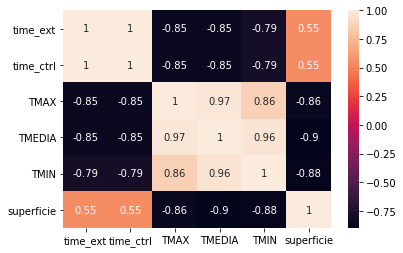

In [61]:
correlation_mat = corr_matrix.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

In [62]:
'''time_ext/time_cntrl
TMAX/TMEDIA
TMIN/TMEDIA 
TMAX/TMIN
time_ctrl/superficie
 -- me voy a quedar solo con TMEDIA, superficie y time_cntr
'''
datos_galicia_reduc =  datos_galicia1.drop(['TMAX','TMIN', 'time_ext'], axis = 'columns')

Vamos a eliminar tambien las variables que tengan menos correlación con la variable objetivo

In [63]:
#vemos los tipos de datos de la target
datos_galicia1['target'].value_counts()

intencionado         11293
causa desconocida      830
negligencia            534
fuego reproducido      215
rayo                   104
Name: target, dtype: int64

Todavía están como tipo object por lo que la pasamos a numérica

In [64]:
datos_galicia1.target.replace(("intencionado","causa desconocida","negligencia","fuego reproducido","rayo"),
                      (1,2,3,4,5),inplace=True)

datos_galicia_reduc.target.replace(("intencionado","causa desconocida","negligencia","fuego reproducido","rayo"),
                      (1,2,3,4,5),inplace=True)

In [65]:
datos_galicia_reduc['target'].value_counts()

1    11293
2      830
3      534
4      215
5      104
Name: target, dtype: int64

Calculamos la correlac

In [66]:
corr = abs(datos_galicia_reduc.corr())
corr[['target']].sort_values(by = 'target',ascending = False).style.background_gradient()

,target
target,1.000000
medios,0.123753
TMEDIA,0.121941
personal,0.099976
Año,0.086746
Lugo,0.079416
ALTITUD,0.075265
lat,0.072122
Ourense,0.067900
Q2,0.067850


In [67]:
#Seleccionamos las que tengan más del 5% de correlación
datos_galicia_reduc = datos_galicia_reduc [['medios', 'TMEDIA','personal','Año','Lugo',
                                           'ALTITUD','lat','Ourense','Q2','mayo','junio','julio','SOL','target']]

In [68]:
len(datos_galicia_reduc.columns)

14

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_galicia_reduc.drop('target', axis = 'columns'),
                                        datos_galicia_reduc['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True,
                                        stratify = datos_galicia_reduc['target'])

### * Modelo 5 - SVM  reducidas variables por correlación

In [70]:
modelo_clf_reduc = svm.SVC(class_weight= None, decision_function_shape='ovo')
modelo_clf_reduc.fit(X_train, y_train)

modelo_clf_reduc.predict(X_test)


modelo5 = ('MODELO 5 : Score modelo SVM reducido teniendo en cuenta correlaciones : {} con {} variables'.format(modelo_clf_reduc.score(X_test,y_test),len(datos_galicia_reduc.columns)))
modelo5

'MODELO 5 : Score modelo SVM reducido teniendo en cuenta correlaciones : 0.8701848998459168 con 14 variables'

----------

### * Modelo 6 -  RF reducido reducidas variables por correlación

Conjuntos de arboles de decisión

In [71]:
modelo_ranfor_reduc = RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= None, n_estimators= 150, class_weight='balanced').fit(X_train, y_train)
y_pred     = modelo_ranfor_reduc.predict(X_test)


modelo6 = ('MODELO 6 :Score modelo Random Forest reducido teniendo en cuenta correlaciones : {} con {} variables'.format(modelo_ranfor_reduc.score(X_test,y_test),len(datos_galicia_reduc.columns)))
modelo6

'MODELO 6 :Score modelo Random Forest reducido teniendo en cuenta correlaciones : 0.8701848998459168 con 14 variables'

---------

### * Modelo 7 => Gradient Boosting reducido reducidas variables por correlación

In [72]:
modelo_gbrt_reduc = GradientBoostingClassifier(random_state=0, n_estimators=500,
                                  max_depth=1, learning_rate=0.01)
modelo_gbrt_reduc.fit(X_train, y_train)

modelo7 = ('MODELO 7 : Score modelo Gradient Boosting reducido teniendo en cuenta correlaciones : {} con {} variables'.format(modelo_gbrt_reduc.score(X_test,y_test),len(datos_galicia_reduc.columns)))
modelo7

'MODELO 7 : Score modelo Gradient Boosting reducido teniendo en cuenta correlaciones : 0.8697996918335902 con 14 variables'

### - Selección de las mejores variables a través de la prueba F

Recordemos las variables que tenemos:

In [73]:
datos_galicia1.columns

Index(['superficie', 'lat', 'lng', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'gastos', 'ALTITUD', 'TMEDIA',
       'PRECIPITACION', 'TMIN', 'TMAX', 'VELMEDIA', 'RACHA', 'SOL', 'Año',
       'PRES_RANGE', 'Lugo', 'Ourense', 'Pontevedra', 'Q2', 'Q3', 'Q4',
       'agosto', 'diciembre', 'enero', 'febrero', 'julio', 'junio', 'marzo',
       'mayo', 'noviembre', 'octubre', 'septiembre', 'N', 'NE', 'NW', 'S',
       'SE', 'SW', 'W', 'target'],
      dtype='object')

In [74]:
k = 10  # número de atributos a seleccionar
columnas = list(datos_galicia1.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(X_train, y_train)
atrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['superficie',
 'lat',
 'lng',
 'muertos',
 'heridos',
 'time_ctrl',
 'time_ext',
 'personal',
 'medios',
 'PRECIPITACION']

Seleccionamos esas columnas del dataset

In [75]:
datos_theBest = datos_galicia1.copy()

In [76]:
datos_theBest = datos_theBest[['superficie',
 'lat',
 'lng',
 'muertos',
 'heridos',
 'time_ctrl',
 'time_ext',
 'personal',
 'medios',
 'PRECIPITACION',
 'target']]

In [77]:
len(datos_theBest.columns)

11

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_theBest.drop('target', axis = 'columns'),
                                        datos_theBest['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True,
                                        stratify = datos_theBest['target'])


### *  Modelo 8 - SMV seleccion de las mejores variables por F

In [79]:
clf_theBest = svm.SVC(class_weight= None, decision_function_shape='ovo')
clf_theBest.fit(X_train, y_train)


modelo8 = ('MODELO 8 : Score modelo SMV estadistico F : {} con {} variables'.format(clf_theBest.score(X_test,y_test),len(datos_theBest.columns)))
modelo8

'MODELO 8 : Score modelo SMV estadistico F : 0.8701848998459168 con 11 variables'

-----

### * Modelo 9 - Random Forest seleccion de las mejores variables por F

In [80]:
modelo_ranfor_theBest = RandomForestClassifier(bootstrap = True, criterion= 'entropy', max_depth=None, n_estimators=150,class_weight='balanced').fit(X_train, y_train)
y_pred     = modelo_ranfor_theBest.predict(X_test)

modelo9 = ('MODELO 9: Score modelo SMV estadistico F : {} con {} variables'.format(modelo_ranfor_theBest.score(X_test,y_test),len(datos_theBest.columns)))
modelo9

'MODELO 9: Score modelo SMV estadistico F : 0.8705701078582434 con 11 variables'

------

### * Modelo 10 - Gradient Boosting seleccion de las mejores variables por F

In [81]:
modelo_gbrt_theBest = GradientBoostingClassifier(random_state=0, n_estimators=500,
                                  max_depth=1, learning_rate=0.01)
modelo_gbrt_theBest.fit(X_train, y_train)


modelo10 = ('MODELO 10 : Score modelo SMV estadistico F : {} con {} variables'.format(modelo_gbrt_theBest.score(X_test,y_test),len(datos_theBest.columns)))
modelo10

'MODELO 10 : Score modelo SMV estadistico F : 0.8701848998459168 con 11 variables'

### -> Selección de las mejores variables a través la importancia de las variables predictoras 

In [82]:
#Con todas las variables
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_galicia1.drop('target', axis = 'columns'),
                                        datos_galicia1['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True,
                                        stratify = datos_theBest['target'])


In [83]:
modelo_ranfor.feature_importances_

array([0.05976211, 0.08644232, 0.08108318, 0.00035509, 0.00025465,
       0.06508303, 0.06669248, 0.06385987, 0.04019237, 0.00768777,
       0.01077811, 0.06062158, 0.00757393, 0.0567882 , 0.0608992 ,
       0.01549273, 0.05088886, 0.05703113, 0.04186735, 0.05302345,
       0.0044928 , 0.00442551, 0.00425036, 0.00683879, 0.0049764 ,
       0.00281112, 0.00506298, 0.00075697, 0.00113726, 0.00317905,
       0.00527654, 0.00447586, 0.00487579, 0.00578402, 0.00066268,
       0.00303944, 0.00464499, 0.00869813, 0.00919536, 0.00732868,
       0.00460768, 0.00414083, 0.00469752, 0.00826384])

In [84]:
modelo_gbrt.feature_importances_

array([0.02500385, 0.1556113 , 0.05660735, 0.00535549, 0.        ,
       0.00935404, 0.01010786, 0.14579285, 0.01989083, 0.        ,
       0.01959691, 0.03786522, 0.00385744, 0.01280531, 0.11218875,
       0.        , 0.00868079, 0.00777312, 0.25547996, 0.        ,
       0.02042585, 0.00341354, 0.0052917 , 0.03783206, 0.00642794,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00240043, 0.00709785, 0.        , 0.03080115, 0.        ,
       0.00033841, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [85]:
datos_galicia1.columns

Index(['superficie', 'lat', 'lng', 'muertos', 'heridos', 'time_ctrl',
       'time_ext', 'personal', 'medios', 'gastos', 'ALTITUD', 'TMEDIA',
       'PRECIPITACION', 'TMIN', 'TMAX', 'VELMEDIA', 'RACHA', 'SOL', 'Año',
       'PRES_RANGE', 'Lugo', 'Ourense', 'Pontevedra', 'Q2', 'Q3', 'Q4',
       'agosto', 'diciembre', 'enero', 'febrero', 'julio', 'junio', 'marzo',
       'mayo', 'noviembre', 'octubre', 'septiembre', 'N', 'NE', 'NW', 'S',
       'SE', 'SW', 'W', 'target'],
      dtype='object')

In [86]:
#seleccionamos los que esten por encima de 0.05
datos_gbrt = datos_galicia1[['lat','lng','personal','medios','TMAX','Año', 'target']]

In [87]:
#seleccionamos los que esten por encima de 0.05
datos_rf = datos_galicia1[['superficie','lat','lng','time_ctrl','personal','medios','TMEDIA','RACHA','SOL','Año','PRES_RANGE','target']]

### * Modelo 11 - GradientBoosting con las variables de mayor importancia

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_gbrt.drop('target', axis = 'columns'),
                                        datos_gbrt['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True,
                                        stratify = datos_gbrt['target'])


modelo_gbrt_mejores = GradientBoostingClassifier(random_state=0, n_estimators=500,
                                  max_depth=1, learning_rate=0.01)
modelo_gbrt_mejores.fit(X_train, y_train)


modelo11 = ('MODELO 11 : Score modelo Gradient Boosting respecto a las variables con mayor importancia : {} con {} variables'.format(modelo_gbrt_mejores.score(X_test,y_test),len(datos_gbrt.columns)))
modelo11

'MODELO 11 : Score modelo Gradient Boosting respecto a las variables con mayor importancia : 0.8701848998459168 con 7 variables'

-------------

### * Modelo 12 - Random Forest con las variables de mayor importancia

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_rf.drop('target', axis = 'columns'),
                                        datos_rf['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True,
                                        stratify = datos_rf['target'])

modelo_ranfor_mejores = RandomForestClassifier(bootstrap = True, criterion= 'entropy', max_depth=None, n_estimators=150,class_weight='balanced').fit(X_train, y_train)
y_pred     = modelo_ranfor_mejores.predict(X_test)


modelo12 = ('MODELO 12 : Score modelo Random Forest respecto a las variables con mayor importancia : {} con {} variables'.format(modelo_ranfor_mejores.score(X_test,y_test),len(datos_rf.columns)))
modelo12

'MODELO 12 : Score modelo Random Forest respecto a las variables con mayor importancia : 0.8713405238828967 con 12 variables'

* Este método de selección de variables no puede hacerse con SVM

## Selección del modelo

Vamos a seleccionar el modelo mediante la validación cruzada de los modelos que mejor resultado nos hayan dado, tanto por su cálculo numérico como su posterior representación gráfica

In [90]:
lista_modelos = [modelo1,modelo2,modelo3,modelo4,modelo5,modelo6,modelo7,modelo8,modelo9,modelo10,modelo11,modelo12]

for i in lista_modelos:
    print(i)

MODELO 1 :Score modelo SVM : 0.8701848998459168 con todas las variables: 45
MODELO 2 : Score modelo Árbol de decisión : 0.7654083204930663 con todas las variables: 45
MODELO 3 : Score modelo Random Forest : 0.8694144838212635 con todas las variables: 45
MODELO 4 : Score modelo Gradient Boosting : 0.8697996918335902 con todas las variables : 45 
MODELO 5 : Score modelo SVM reducido teniendo en cuenta correlaciones : 0.8701848998459168 con 14 variables
MODELO 6 :Score modelo Random Forest reducido teniendo en cuenta correlaciones : 0.8701848998459168 con 14 variables
MODELO 7 : Score modelo Gradient Boosting reducido teniendo en cuenta correlaciones : 0.8697996918335902 con 14 variables
MODELO 8 : Score modelo SMV estadistico F : 0.8701848998459168 con 11 variables
MODELO 9: Score modelo SMV estadistico F : 0.8705701078582434 con 11 variables
MODELO 10 : Score modelo SMV estadistico F : 0.8701848998459168 con 11 variables
MODELO 11 : Score modelo Gradient Boosting respecto a las variable

### * Validación cruzada

En SVM no se ha visto modificado la precisión del modelo modificando los parámetros, por lo que haremos la validación cruzada del modelo que mas "limpio" consideramos

In [91]:
#Modelo 8
results_modelo_clf_theBest = cross_val_score(estimator=clf_theBest, X=X_train, y=y_train, cv=5)

In [92]:
print(' Score: {}' .format(results_modelo_clf_theBest.mean()))
print(' Desviación: {}'.format(results_modelo_clf_theBest.std()))

 Score: 0.8703275529865125
 Desviación: 0.00019267822736028782


Por otro lado, vamos a hacerla para aquellos mejores modelos de RF

In [93]:
#Modelo 9
results_modelo_ranfor_theBest = cross_val_score(estimator=modelo_ranfor_theBest, X=X_train, y=y_train, cv=5)

In [94]:
print(' Score: {}' .format(results_modelo_ranfor_theBest.mean()))
print(' Desviación: {}'.format(results_modelo_ranfor_theBest.std()))

 Score: 0.8711946050096339
 Desviación: 0.0006534036592606193


In [95]:
#Modelo 12
results_modelo_ranfor_mejores = cross_val_score(estimator=modelo_ranfor_mejores, X=X_train, y=y_train, cv=5)

In [96]:
print(' Score: {}' .format(results_modelo_ranfor_mejores.mean()))
print(' Desviación: {}'.format(results_modelo_ranfor_mejores.std()))

 Score: 0.870712909441233
 Desviación: 0.0004912350205773353


In [97]:
#Modelo 11
results_modelo_gbrt_mejores = cross_val_score(estimator=modelo_gbrt_mejores, X=X_train, y=y_train, cv=5)

In [98]:
print(' Score: {}' .format(results_modelo_gbrt_mejores.mean()))
print(' Desviación: {}'.format(results_modelo_gbrt_mejores.std()))

 Score: 0.869942196531792
 Desviación: 0.0010104131485261774


Todos tienen varianzas muy bajas y muy buenos resultados, podría ser válido cualquiera de ellos.
Vamos a verlo de una manera más visual antes de elegir


### * Visualización de los modelos

In [99]:
# Listado con los modelos a evaluar
def get_models():
    models=dict()
    models['Random_forest'] = RandomForestClassifier(bootstrap = True, criterion= 'entropy', max_depth=None,
                                                     n_estimators=150,class_weight='balanced').fit(X_train, y_train)
    models['SVC'] = svm.SVC(class_weight= None, decision_function_shape='ovo')
    models['Gradient_Boosting'] = GradientBoostingClassifier(random_state=0, n_estimators=500,
                                  max_depth=1, learning_rate=0.01)
    return models
    
    
    
# Evaluar los modelos usando la Validación cruzada
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
    scores_cv = cross_val_score(model, X, y, scoring= 'accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores_cv



In [100]:
# Lista con los modelos a evaluar
models = get_models()

In [101]:
# Evaluar los modelos y guardar los resultados (score, media y desviación típica)
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>Random_forest 0.871 (0.001)
>SVC 0.870 (0.000)
>Gradient_Boosting 0.870 (0.001)


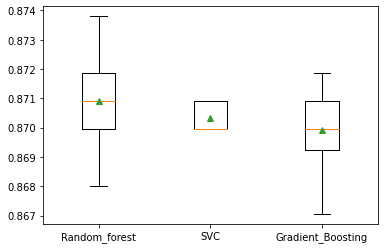

In [102]:
# Visualizar graficamente los modelos evaluados - BOXPLOT

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Los tres modelos seleccionados tienen una capacidad predictiva por encima del 85% y varianzas muy bajas, lo que demuestra que sus predicciones no son aleatorias.
El modelo que mejores resultados llega a obtener y más sencilla es su comprensión es Random Forest, por lo que el modelo seleccionado finalmente será el MODELO 12.

## Predicción

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_rf.drop('target', axis = 'columns'),
                                        datos_rf['target'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True,
                                        stratify = datos_rf['target'])


In [104]:
modelo_ranfor_mejores = RandomForestClassifier(bootstrap = True, criterion= 'entropy', max_depth=None, n_estimators=150,class_weight='balanced').fit(X_train, y_train)
y_pred     = modelo_ranfor_mejores.predict(X_test)

modelo_ranfor_mejores.score(X_test, y_test)

0.8713405238828967

In [105]:
y_pred = modelo_ranfor_mejores.predict(X_test)

In [106]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

#### Visualización del modelo

In [107]:
def saca_metricas(y1, y2):
    print('Matriz de confusión: ')
    print(multilabel_confusion_matrix(y1, y2, labels=y_test.unique()))
    print('\n Accuracy')
    print(accuracy_score(y1, y2))
    print('\n Precision')
    print(precision_score(y1, y2, average='weighted'))
    print('\n Recall')
    print(recall_score(y1, y2, average='weighted'))
    print('\n f1')
    print(f1_score(y1, y2, average='weighted'))
    '''false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('\n AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)'''

In [108]:
saca_metricas(y_test, y_pred)

Matriz de confusión: 
[[[   5  332]
  [   2 2257]]

 [[2575    0]
  [  18    3]]

 [[2489    0]
  [ 107    0]]

 [[2552    1]
  [  43    0]]

 [[2429    1]
  [ 164    2]]]

 Accuracy
0.8713405238828967

 Precision
0.8093159336555452

 Recall
0.8713405238828967

 f1
0.8137698645378528


C:\Users\rtx9652\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Importancia de los predictores

In [109]:
importancia_pred = pd.DataFrame(
                            {'predictor': datos_rf.drop(columns = "target").columns,
                             'importancia': modelo_ranfor_mejores.feature_importances_}
                            )


In [110]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_pred.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
6,TMEDIA,0.163695
2,lng,0.122532
1,lat,0.116276
8,SOL,0.092015
3,time_ctrl,0.087114
10,PRES_RANGE,0.085111
4,personal,0.076662
7,RACHA,0.075555
9,Año,0.070233
0,superficie,0.068720


In [111]:
datos_rf.dtypes

superficie    float64
lat           float64
lng           float64
time_ctrl     float64
personal        int64
medios          int64
TMEDIA        float64
RACHA         float64
SOL           float64
Año             int64
PRES_RANGE    float64
target          int64
dtype: object

In [112]:
'''Guardamos el dataset final del modelo'''
#datos_rf.to_csv('dataset_modelo.csv')'''

'Guardamos el dataset final del modelo'